<a href="https://colab.research.google.com/github/engineertorikulislam/Machine-Learning-and-Data-Mining-Projects/blob/main/Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Md Torikul Islam


# ID: 192002131

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tae.data to tae.data


In [ ]:
# data_set= pd.read_csv('tae.txt')
df = pd.read_csv('tae.data',names=['native_teacher', 'instructor', 'course', 'semester', 'class_size', 'performance'])
# df = pd.read_csv('tae.data')


In [ ]:
# df.head().transpose()
df.head()
# df

,native_teacher,instructor,course,semester,class_size,performance
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [ ]:
df.describe().transpose()  # statistical analysis 

,count,mean,std,min,25%,50%,75%,max
native_teacher,151.0,1.807947,0.395225,1.0,2.0,2.0,2.0,2.0
instructor,151.0,13.642384,6.825779,1.0,8.0,13.0,20.0,25.0
course,151.0,8.105960,7.023914,1.0,3.0,4.0,15.0,26.0
semester,151.0,1.847682,0.360525,1.0,2.0,2.0,2.0,2.0
class_size,151.0,27.867550,12.893758,3.0,19.0,27.0,37.0,66.0
performance,151.0,2.019868,0.820327,1.0,1.0,2.0,3.0,3.0


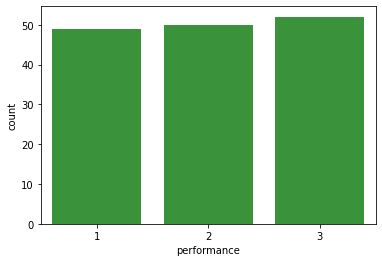

In [ ]:
df_performance = df.groupby('performance')[['native_teacher']].count().reset_index().rename(columns={'native_teacher': 'count'})
sns.barplot(x='performance', y='count', data=df_performance, color='tab:green')
plt.show()

evaluation of teaching performance based on scores, i.e., "low", "medium", or "high"

In [ ]:
X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 5].values
# X = df.iloc[:,1:] 
# Y = df.iloc[:,5:]

In [ ]:
print(Y)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [ ]:
print(X)

[[ 3  1]
 [ 3  1]
 [ 3  2]
 [ 2  2]
 [11  2]
 [ 3  1]
 [ 5  2]
 [ 3  2]
 [ 3  1]
 [ 3  1]
 [22  2]
 [ 1  2]
 [21  2]
 [17  2]
 [17  2]
 [17  2]
 [11  2]
 [ 3  2]
 [ 3  1]
 [25  2]
 [ 7  2]
 [ 7  2]
 [ 9  2]
 [15  1]
 [13  2]
 [11  2]
 [ 3  2]
 [15  2]
 [ 2  2]
 [ 3  2]
 [ 1  2]
 [ 5  2]
 [ 1  2]
 [ 3  1]
 [ 2  2]
 [ 8  2]
 [16  2]
 [ 2  2]
 [15  2]
 [ 3  1]
 [ 3  1]
 [ 3  2]
 [ 2  2]
 [11  2]
 [ 3  1]
 [ 5  2]
 [ 3  2]
 [ 3  2]
 [ 3  1]
 [22  2]
 [ 1  2]
 [21  2]
 [17  2]
 [17  2]
 [17  2]
 [11  2]
 [ 3  2]
 [ 3  1]
 [25  2]
 [ 7  2]
 [ 7  2]
 [ 9  2]
 [15  1]
 [13  2]
 [11  2]
 [ 3  2]
 [15  2]
 [ 2  2]
 [ 3  2]
 [ 1  2]
 [ 5  2]
 [ 1  2]
 [ 3  1]
 [ 2  2]
 [ 8  2]
 [16  2]
 [ 2  2]
 [15  2]
 [ 3  1]
 [ 3  1]
 [19  2]
 [ 2  2]
 [ 3  1]
 [21  2]
 [ 3  2]
 [11  1]
 [ 3  1]
 [ 3  1]
 [ 3  2]
 [22  2]
 [17  2]
 [ 5  2]
 [25  2]
 [17  2]
 [15  2]
 [ 8  2]
 [16  2]
 [13  2]
 [ 2  2]
 [ 1  2]
 [17  2]
 [ 3  1]
 [ 3  1]
 [17  2]
 [ 3  2]
 [ 2  2]
 [ 3  2]
 [ 2  2]
 [ 3  2]
 [ 1  2]
 [ 3  2]
 

# Logistic Regression

---



In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [ ]:
Y_Pred = classifier.predict(X_Test)
Y_Pred

array([1, 3, 3, 1, 1, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2,
       2, 3, 1, 1, 3, 2, 2, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[6, 0, 1],
       [3, 8, 1],
       [3, 4, 5]])

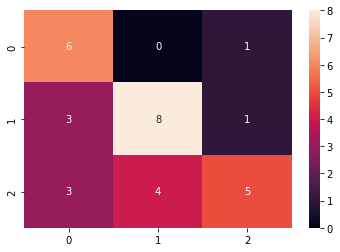

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy =accuracy_score(Y_Test, Y_Pred)
accuracy

0.6129032258064516

# **KNN**

In [ ]:
#Extracting Independent and dependent Variable  
x = df.iloc[:, [2,3]].values  
y = df.iloc[:, 5].values

In [ ]:
#Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test) 

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors = 5,
metric ='minkowski', p = 2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier(algorithm = 'auto', leaf_size = 30,
metric = 'minkowski',  
metric_params = None, n_jobs = None, n_neighbors = 5, p = 2,  
weights = 'uniform')  

KNeighborsClassifier()

In [ ]:
#Predicting the test set result 
y_pred = classifier.predict(x_test) 

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [ ]:
cm

array([[5, 1, 1],
       [2, 8, 2],
       [2, 2, 8]])

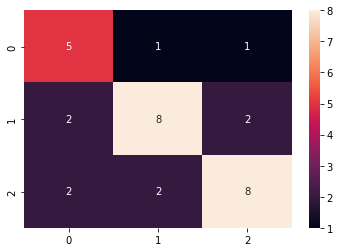

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
accuracy=classifier.score(x_test,y_test)
accuracy

0.6774193548387096

## Linear Regression 

---



In [ ]:
x=df[['native_teacher','instructor','course','semester','class_size']]
y=df['performance']

In [ ]:
x


,native_teacher,instructor,course,semester,class_size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
...,...,...,...,...,...
146,2,3,2,2,26
147,2,10,3,2,12
148,1,18,7,2,48
149,2,22,1,2,51


In [ ]:
y

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: performance, Length: 151, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
r= LinearRegression()
r.fit(xtrain,ytrain)
score = r.score(xtest, ytest)

In [ ]:
r.predict(xtest)

array([2.17180887, 1.64803011, 2.10026101, 1.93074701, 2.81607555,
       1.77737006, 2.22697698, 2.31423251, 1.75071994, 1.67324982,
       2.07083732, 2.31423251, 2.88112264, 2.3294788 , 2.88852546,
       2.22795787, 2.45519463, 2.13025369, 1.78812086, 1.90447245,
       2.74615196, 2.34277963, 2.13025369, 2.27960471, 2.25632628,
       1.63909702, 2.83302606, 2.43885829, 1.66698999, 1.68175176,
       1.76156429, 1.87161265, 1.67744793, 1.65973133, 1.85350875,
       2.2840464 , 2.17180887, 1.73476503, 2.17328943, 2.33618895,
       2.68826044, 1.77737006, 1.64516298, 2.16440606, 2.43885829,
       1.87419234])

In [ ]:
score = r.score(xtest, ytest);
score

0.07301871944578564

In [ ]:
print("Logistic Regration ")